# **Título**

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./..')

from image_gen import GenerativeModel
from image_gen.diffusion import VarianceExploding, VariancePreserving, SubVariancePreserving
from image_gen.noise import LinearNoiseSchedule
from image_gen.samplers import EulerMaruyama

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\samplers\euler_maruyama.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
schedule = LinearNoiseSchedule()
diffusion = VarianceExploding(schedule)
sampler = EulerMaruyama(diffusion)

model = GenerativeModel(
    diffusion=diffusion,
    sampler=sampler,
    image_size=(32, 32)
)

In [3]:
def get_cifar_dataset(class_id=None):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    
    train_dataset = datasets.CIFAR10(
        root='./data', 
        train=True,
        download=True,
        transform=transform
    )
    
    # CIFAR-10 classes
    classes = ('airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck')
    
    if class_id is not None: 
        targets = torch.tensor(train_dataset.targets)
        idx = (targets == class_id).nonzero().flatten()
        
        train_dataset = torch.utils.data.Subset(train_dataset, idx)
        print(f"Selected {len(train_dataset)} images of class: {classes[class_id]}")
    
    return train_dataset

In [4]:
dataset = get_cifar_dataset(class_id=1)

Selected 5000 images of class: car


In [12]:
model.train(dataset, epochs=500)
model.save('cifar10_500e_ve.pth')
# model.load('cifar10_100e_ve.pth')

Training:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 11:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 12:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 13:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 14:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 15:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 16:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 17:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 18:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 19:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 20:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 21:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 22:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 23:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 24:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 25:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 26:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 27:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 28:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 29:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 31:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 32:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 33:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 34:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 35:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 36:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 37:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 38:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 39:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 41:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 42:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 43:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 44:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 45:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 46:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 47:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 48:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 49:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 50:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 51:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 52:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 53:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 54:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 55:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 56:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 57:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 58:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 59:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 60:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 61:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 62:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 63:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 64:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 65:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 66:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 67:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 68:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 69:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 70:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 71:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 72:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 73:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 74:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 75:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 76:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 77:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 78:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 79:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 80:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 81:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 82:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 83:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 84:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 85:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 86:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 87:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 88:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 89:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 90:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 91:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 92:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 93:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 94:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 95:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 96:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 97:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 98:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 99:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 100:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 101:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 102:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 103:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 104:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 105:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 106:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 107:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 108:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 109:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 110:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 111:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 112:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 113:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 114:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 115:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 116:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 117:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 118:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 119:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 120:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 121:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 122:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 123:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 124:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 125:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 126:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 127:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 128:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 129:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 130:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 131:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 132:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 133:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 134:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 135:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 136:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 137:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 138:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 139:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 140:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 141:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 142:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 143:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 144:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 145:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 146:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 147:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 148:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 149:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 150:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 151:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 152:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 153:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 154:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 155:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 156:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 157:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 158:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 159:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 160:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 161:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 162:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 163:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 164:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 165:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 166:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 167:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 168:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 169:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 170:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 171:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 172:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 173:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 174:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 175:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 176:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 177:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 178:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 179:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 180:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 181:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 182:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 183:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 184:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 185:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 186:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 187:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 188:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 189:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 190:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 191:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 192:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 193:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 194:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 195:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 196:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 197:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 198:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 199:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 200:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 201:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 202:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 203:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 204:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 205:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 206:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 207:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 208:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 209:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 210:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 211:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 212:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 213:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 214:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 215:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 216:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 217:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 218:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 219:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 220:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 221:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 222:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 223:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 224:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 225:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 226:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 227:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 228:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 229:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 230:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 231:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 232:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 233:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 234:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 235:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 236:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 237:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 238:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 239:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 240:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 241:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 242:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 243:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 244:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 245:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 246:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 247:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 248:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 249:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 250:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 251:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 252:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 253:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 254:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 255:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 256:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 257:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 258:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 259:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 260:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 261:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 262:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 263:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 264:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 265:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 266:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 267:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 268:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 269:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 270:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 271:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 272:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 273:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 274:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 275:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 276:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 277:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 278:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 279:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 280:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 281:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 282:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 283:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 284:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 285:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 286:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 287:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 288:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 289:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 290:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 291:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 292:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 293:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 294:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 295:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 296:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 297:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 298:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 299:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 300:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 301:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 302:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 303:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 304:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 305:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 306:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 307:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 308:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 309:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 310:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 311:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 312:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 313:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 314:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 315:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 316:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 317:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 318:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 319:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 320:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 321:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 322:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 323:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 324:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 325:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 326:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 327:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 328:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 329:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 330:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 331:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 332:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 333:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 334:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 335:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 336:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 337:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 338:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 339:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 340:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 341:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 342:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 343:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 344:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 345:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 346:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 347:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 348:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 349:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 350:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 351:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 352:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 353:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 354:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 355:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 356:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 357:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 358:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 359:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 360:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 361:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 362:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 363:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 364:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 365:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 366:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 367:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 368:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 369:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 370:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 371:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 372:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 373:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 374:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 375:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 376:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 377:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 378:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 379:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 380:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 381:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 382:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 383:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 384:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 385:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 386:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 387:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 388:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 389:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 390:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 391:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 392:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 393:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 394:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 395:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 396:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 397:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 398:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 399:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 400:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 401:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 402:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 403:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 404:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 405:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 406:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 407:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 408:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 409:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 410:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 411:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 412:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 413:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 414:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 415:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 416:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 417:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 418:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 419:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 420:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 421:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 422:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 423:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 424:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 425:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 426:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 427:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 428:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 429:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 430:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 431:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 432:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 433:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 434:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 435:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 436:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 437:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 438:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 439:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 440:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 441:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 442:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 443:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 444:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 445:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 446:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 447:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 448:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 449:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 450:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 451:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 452:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 453:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 454:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 455:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 456:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 457:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 458:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 459:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 460:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 461:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 462:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 463:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 464:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 465:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 466:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 467:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 468:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 469:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 470:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 471:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 472:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 473:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 474:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 475:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 476:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 477:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 478:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 479:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 480:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 481:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 482:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 483:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 484:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 485:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 486:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 487:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 488:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 489:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 490:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 491:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 492:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 493:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 494:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 495:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 496:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 497:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 498:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 499:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 500:   0%|          | 0/157 [00:00<?, ?it/s]

In [13]:
n_images = 16
samples = model.generate(n_images)

Generating:   0%|          | 0/500 [00:00<?, ?it/s]

Step 0: t=1.000, mean=-0.005, std=1.493
Step 50: t=0.900, mean=-0.012, std=4.491
Step 100: t=0.800, mean=-0.028, std=3.963
Step 150: t=0.700, mean=-0.036, std=3.234
Step 200: t=0.600, mean=-0.040, std=2.506
Step 250: t=0.501, mean=-0.034, std=1.891
Step 300: t=0.401, mean=-0.042, std=1.405
Step 350: t=0.301, mean=-0.040, std=1.028
Step 400: t=0.201, mean=-0.039, std=0.747
Step 450: t=0.101, mean=-0.040, std=0.545


In [26]:
def show_images(images, n_images=4, contrast=1.0):
    images = images[:n_images]  # Select only the first n_images
    images = images.permute(0, 2, 3, 1).cpu().detach().numpy()
    images = (images + 1) / 2  # Scale from [-1,1] to [0,1]
    
    # Convert to grayscale intensity for proper contrast scaling
    mean = images.mean(axis=(1, 2, 3), keepdims=True)
    std = images.std(axis=(1, 2, 3), keepdims=True) + 1e-6  # Avoid division by zero

    # Adjust contrast properly
    images = mean + contrast * (images - mean)
    images = np.clip(images, 0, 1)  # Ensure values remain in [0,1]

    grid_size = int(np.sqrt(n_images))  # Ensure a square-like grid
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(4, 4))
    axes = axes.flatten()
    
    for idx, img in enumerate(images):
        axes[idx].imshow(img)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

In [15]:
def visualize_cifar_images(dataset, n_images=4):
    fig, axes = plt.subplots(int(np.sqrt(n_images)), int(np.sqrt(n_images)), figsize=(4, 4))
    axes = axes.flatten()
    
    for i in range(n_images):
        img, label = dataset[i]  # Get image and label
        img = img.permute(1, 2, 0).numpy()  # Convert to (H, W, C)
        img = (img + 1) / 2  # Rescale from [-1, 1] to [0, 1]
        
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

### Originales

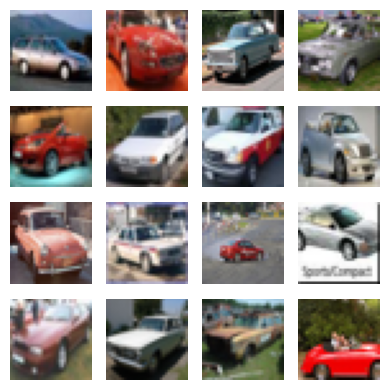

In [16]:
visualize_cifar_images(dataset, n_images=n_images)

### Generadas

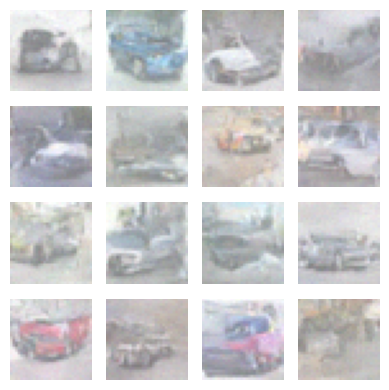

In [38]:
show_images(samples, n_images=n_images, contrast=1)